In [17]:
import matplotlib.pyplot as plt
from math import pi
import numpy as np
from skimage import io, img_as_float
from skimage.transform import rotate, EuclideanTransform, SimilarityTransform, \
    warp, swirl, matrix_transform 

In [18]:
def show_comparison(original, transformed, transformed_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(transformed)
    ax2.set_title(transformed_name)
    ax2.axis('off')
    io.show()

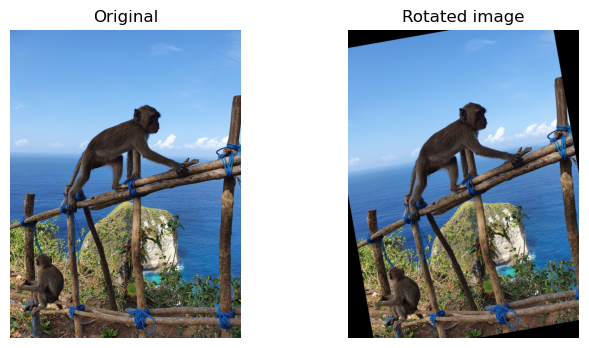

In [19]:
# exercise 1: rotate an image
img_dir = "data/"
img_name = 'NusaPenida.png'
im_org = io.imread(img_dir + img_name)
# angle in degrees - counter clockwise
rotation_angle = 10
rotated_img = rotate(im_org, rotation_angle)
show_comparison(im_org, rotated_img, "Rotated image")

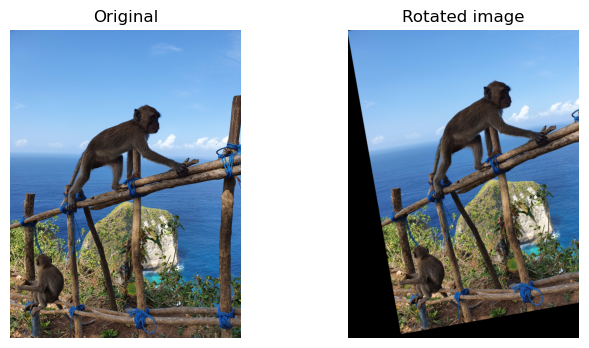

In [20]:
# specify centre of rotation
rot_center = [10, 10]
rotated_img = rotate(im_org, rotation_angle, center=rot_center)
show_comparison(im_org, rotated_img, "Rotated image")

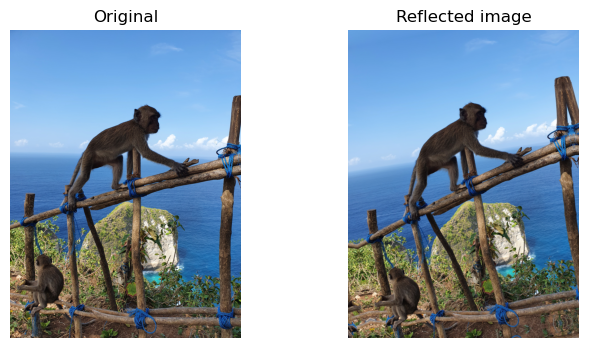

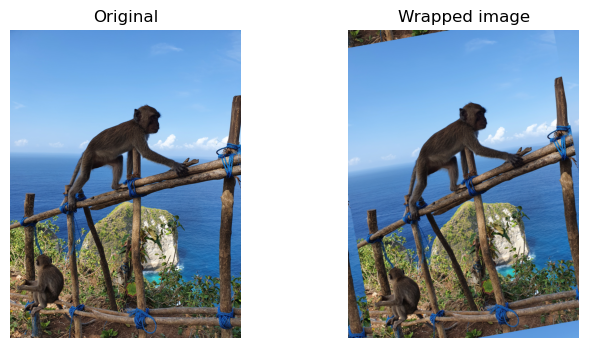

In [21]:
# exercise 2: rotate and fill with reflect
rot_center = [0, 0]
rotated_img = rotate(im_org, rotation_angle, mode="reflect")
show_comparison(im_org, rotated_img, "Reflected image")

# exercise 3: rotate and fill with wrap
rotated_img = rotate(im_org, rotation_angle, mode="wrap")
show_comparison(im_org, rotated_img, "Wrapped image")

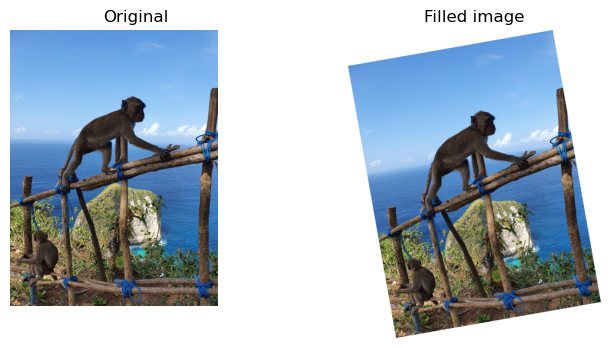

In [22]:
# exercise 4: rotate and fill with constant
rotated_img = rotate(im_org, rotation_angle, resize=True, mode="constant", 
                     cval=1)
show_comparison(im_org, rotated_img, "Filled image")

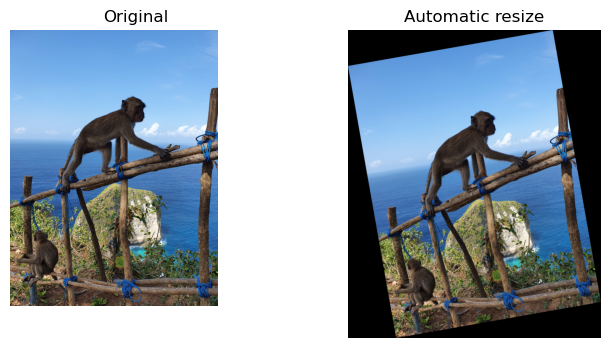

In [23]:
# exercise 5: automatic resizing rotated img to fit frame
rotated_img = rotate(im_org, rotation_angle, resize=True)
show_comparison(im_org, rotated_img, "Automatic resize")

In [24]:
# exercise 6: euclidean image transformation
# angle in radians - counter clockwise
rotation_angle = 10.0 * pi / 180.
trans = [10, 20]
tform = EuclideanTransform(rotation=rotation_angle, translation=trans)
print(tform.params)

[[ 0.98480775 -0.17364818 10.        ]
 [ 0.17364818  0.98480775 20.        ]
 [ 0.          0.          1.        ]]


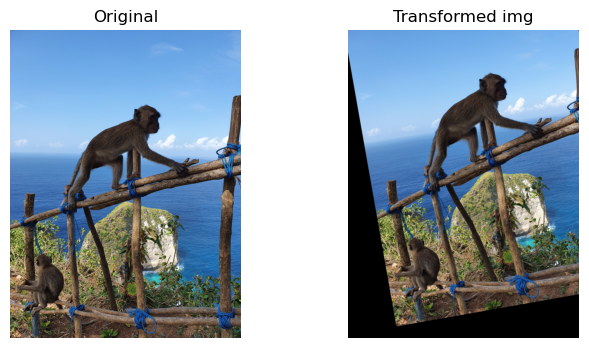

In [25]:
# exercise 7
transformed_img = warp(im_org, tform)
show_comparison(im_org, transformed_img, "Transformed img")

[[ 0.98480775 -0.17364818  0.        ]
 [ 0.17364818  0.98480775  0.        ]
 [ 0.          0.          1.        ]]


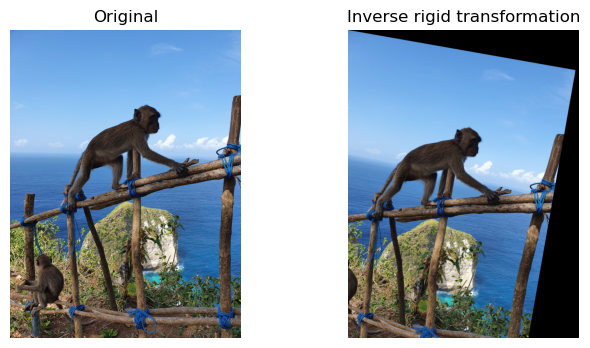

In [35]:
# exercise 8: Euclidean transformation with rotation only
rotation_angle = 10.0 * pi / 180.
tform = EuclideanTransform(rotation=rotation_angle)
print(tform.params)
transformed_img = warp(im_org, tform.inverse)   # inverse transformation
show_comparison(im_org, transformed_img, "Inverse rigid transformation")

[[ 0.5795555  -0.15529143 40.        ]
 [ 0.15529143  0.5795555  30.        ]
 [ 0.          0.          1.        ]]


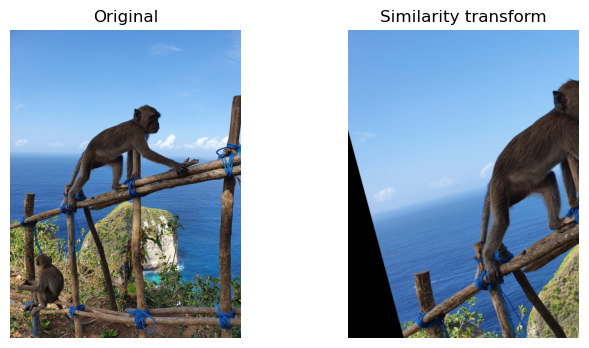

In [36]:
# exercise 9: Similarity transform
rotation_angle = 15.0 * pi / 180.
trans = [40, 30]
scaling=0.6
tform = SimilarityTransform(rotation=rotation_angle,
                            translation=trans,scale=scaling)
print(tform.params)
transformed_img = warp(im_org, tform)   # inverse transformation
show_comparison(im_org, transformed_img, "Similarity transform")

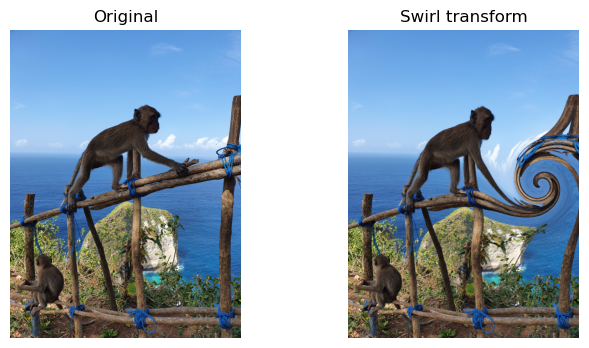

In [28]:
# exercise 10: swirl img transform
strength = 10
rad = 300
c = [500, 400]
swirl_img = swirl(im_org, strength=strength, radius=rad, center=c)
show_comparison(im_org, swirl_img, "Swirl transform")

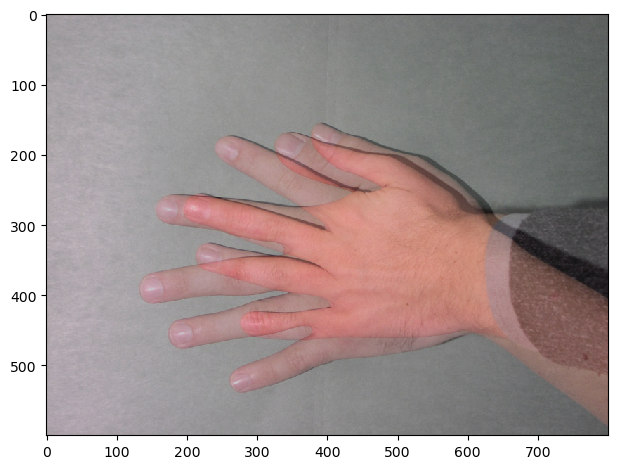

In [29]:
# exercise 11: landmark based registration

src_img = io.imread(img_dir + 'Hand1.jpg')
dst_img = io.imread(img_dir + 'Hand2.jpg')

blend = 0.5 * img_as_float(src_img) + 0.5 * img_as_float(dst_img)
io.imshow(blend)
io.show()

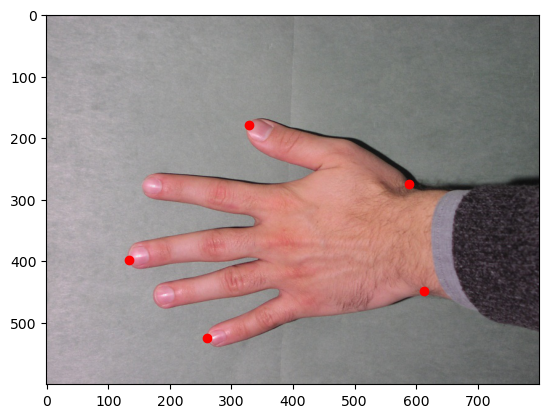

In [30]:
# exercise 12: manual landmark registration
src = np.array([[588, 274], [328, 179], [134, 398], 
                [260, 525], [613, 448]])

plt.imshow(src_img)
plt.plot(src[:, 0], src[:, 1], '.r', markersize=12)
plt.show()

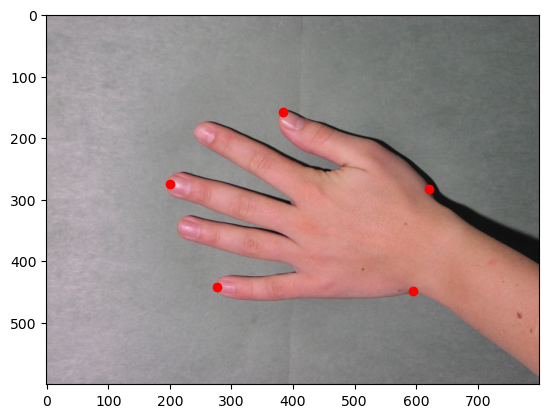

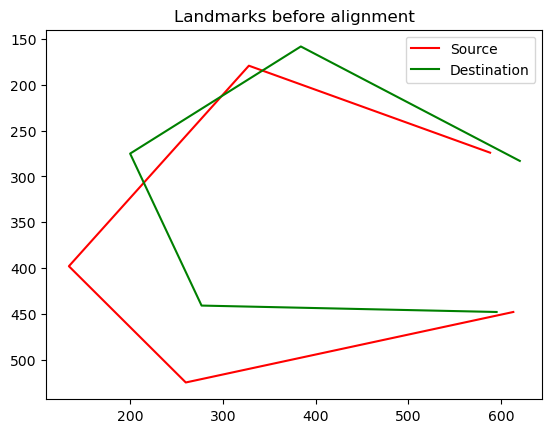

In [31]:
# exercise 13: from ex7_ex13.py
dst = np.array([[620, 283],[384, 158],[200, 275],
                [277, 441],[595, 448]])

plt.imshow(dst_img)
plt.plot(dst[:, 0], dst[:, 1], '.r', markersize=12)
plt.show()

fig, ax = plt.subplots()

ax.plot(src[:, 0], src[:, 1], '-r', markersize=12, label="Source")
ax.plot(dst[:, 0], dst[:, 1], '-g', markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks before alignment")
plt.show()

In [32]:
# exercise 14: compute objective function (sum of squared error)
e_x = src[:, 0] - dst[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src[:, 1] - dst[:, 1]
error_y = np.dot(e_y, e_y)
f = error_x + error_y
print(f"Landmark alignment error F: {f}")

# find optimal transform of src points/landmarks
tform = EuclideanTransform()
tform.estimate(src, dst)
src_transform = matrix_transform(src, tform.params)
print(src_transform)

Landmark alignment error F: 31836
[[634.51454695 282.04708617]
 [405.17995941 127.02887126]
 [164.00471164 292.65344632]
 [255.57782045 446.33937847]
 [616.72296155 456.93121778]]


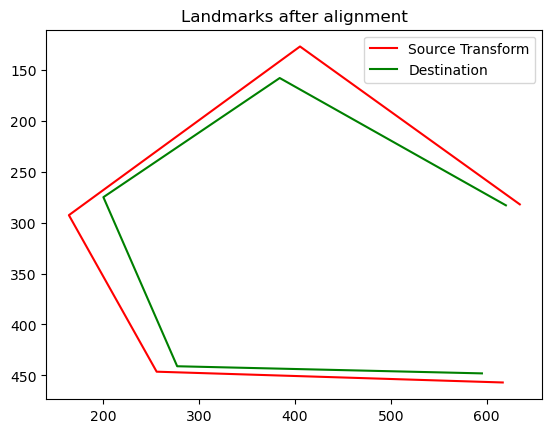

Landmark alignment error F: 4265.75901388823


In [33]:
# exercise 15: recompute objective function

fig, ax = plt.subplots()
ax.plot(src_transform[:, 0], src_transform[:, 1], '-r', markersize=12, label="Source Transform")
ax.plot(dst[:, 0], dst[:, 1], '-g', markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks after alignment")
plt.show()

e_x = src_transform[:, 0] - dst[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src_transform[:, 1] - dst[:, 1]
error_y = np.dot(e_y, e_y)
f = error_x + error_y
print(f"Landmark alignment error F: {f}")

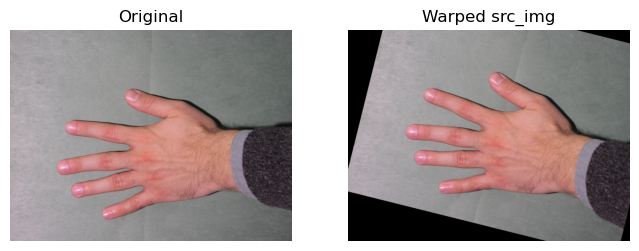

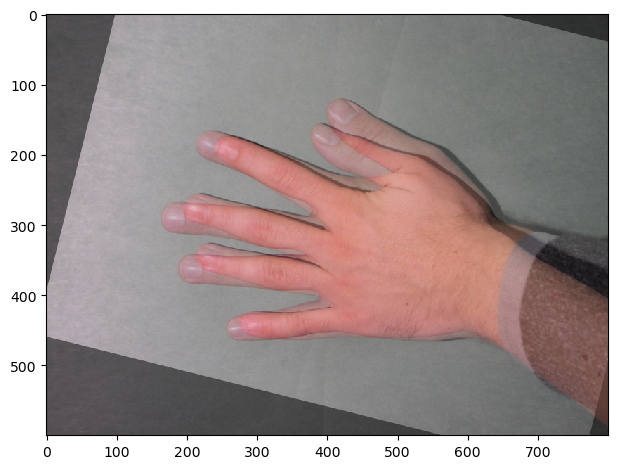

In [34]:
# exercise 16: apply transformation to src img
warped = warp(src_img, tform.inverse)
show_comparison(src_img, warped, "Warped src_img")

blend = 0.5 * img_as_float(warped) + 0.5 * img_as_float(dst_img)
io.imshow(blend)
io.show()